## Pip Installs and Imports

In [1]:
# pip install convokit

In [2]:
# pip install seaborn

In [3]:
from convokit import Corpus, download
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import time

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Explorative Data Anlyses

In [4]:
corpus = Corpus(filename=download("movie-corpus"))

In [5]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [6]:
utterances = corpus.get_utterances_dataframe() # text of the conversations

In [7]:
utterances.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [8]:
utterances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304713 entries, L1045 to L666256
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        0 non-null       object
 1   text             304713 non-null  object
 2   speaker          304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   vectors          304713 non-null  object
dtypes: object(8)
memory usage: 20.9+ MB


In [9]:
conversations = corpus.get_conversations_dataframe() # movie genres linked to conversations

In [10]:
conversations.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [11]:
conversations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83097 entries, L1044 to L666256
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   vectors            83097 non-null  object
 1   meta.movie_idx     83097 non-null  object
 2   meta.movie_name    83097 non-null  object
 3   meta.release_year  83097 non-null  object
 4   meta.rating        83097 non-null  object
 5   meta.votes         83097 non-null  object
 6   meta.genre         83097 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [12]:
conversations.describe()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
count,83097,83097,83097,83097,83097,83097,83097
unique,1,617,617,88,62,614,290
top,[],m289,casino,1999,7.20,111223,['drama']
freq,83097,338,338,6646,3694,338,5027


In [13]:
characters = corpus.get_speakers_dataframe() # name and gender of speaker 

In [14]:
characters.head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [15]:
characters['meta.gender'].value_counts()

meta.gender
?    6020
m    1899
f     921
M     150
F      45
Name: count, dtype: int64

In [16]:
# Clean the gender column
characters['meta.gender'] = characters['meta.gender'].str.lower()
characters['meta.gender'].value_counts()

meta.gender
?    6020
m    2049
f     966
Name: count, dtype: int64

In [17]:
print(characters['meta.gender'].unique())

['f' 'm' '?']


In [18]:
# Drop the ? value
rows_to_drop = characters[characters['meta.gender'] == '?'].index
characters = characters.drop(rows_to_drop)
characters['meta.gender'].value_counts()

meta.gender
m    2049
f     966
Name: count, dtype: int64

## Merge the Dataframes

In [19]:
# Merge the DataFrames on 'conversation_id' from utterances and 'id' from conversations
merged_df = pd.merge(utterances, conversations, left_on='conversation_id', right_on='id', suffixes=('_utterance', '_conversation'))
merged_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [20]:
# # Merge the DataFrames on 'speaker' from merged and 'id' from character
final_df = pd.merge(merged_df, characters, left_on='speaker', right_on='id', how='left', suffixes=('_merged', '_character'))
final_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,...,meta.release_year,meta.rating,meta.votes,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,...,1999,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4


In [21]:
final_df['speaker'].value_counts() # how many times we see every speaker intervenes

speaker
u4525    537
u1169    489
u1475    472
u3681    467
u4331    465
        ... 
u7566      3
u7562      3
u8483      3
u1840      3
u8011      3
Name: count, Length: 9035, dtype: int64

In [22]:
# Add a column with the number of line each character has
final_df['line_count'] = final_df.groupby('speaker')['speaker'].transform('size')
final_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,...,meta.rating,meta.votes,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos,line_count
0,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98
1,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78
2,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98
3,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78
4,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,...,6.90,62847,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98


In [23]:
final_df.shape

(304713, 22)

In [24]:
# Check all null values
print(final_df.isnull().sum())

timestamp                    304713
text                              0
speaker                           0
reply_to                      83097
conversation_id                   0
meta.movie_id                     0
meta.parsed                       0
vectors_utterance                 0
vectors_conversation              0
meta.movie_idx_merged             0
meta.movie_name_merged            0
meta.release_year                 0
meta.rating                       0
meta.votes                        0
meta.genre                        0
vectors                       62690
meta.character_name           62690
meta.movie_idx_character      62690
meta.movie_name_character     62690
meta.gender                   62690
meta.credit_pos               62690
line_count                        0
dtype: int64


In [25]:
# Drop null values in gender after the mergin of datasets
final_df = final_df.dropna(subset=['meta.gender'])
final_df['meta.gender'].isnull().sum()

0

In [26]:
final_df['meta.gender'].value_counts()

meta.gender
m    170768
f     71255
Name: count, dtype: int64

In [27]:
final_df = final_df.drop(columns=['timestamp'])
final_df = final_df.drop(columns=['reply_to'])
print(final_df.isnull().sum()) # no null values present

text                         0
speaker                      0
conversation_id              0
meta.movie_id                0
meta.parsed                  0
vectors_utterance            0
vectors_conversation         0
meta.movie_idx_merged        0
meta.movie_name_merged       0
meta.release_year            0
meta.rating                  0
meta.votes                   0
meta.genre                   0
vectors                      0
meta.character_name          0
meta.movie_idx_character     0
meta.movie_name_character    0
meta.gender                  0
meta.credit_pos              0
line_count                   0
dtype: int64


In [28]:
# Credit column
final_df['meta.credit_pos'].value_counts()

meta.credit_pos
1       79624
2       46521
3       26075
?       26028
4       15423
5       10518
6        8533
8        4726
7        4675
9        3075
10       1861
1000     1475
11       1418
13       1375
16       1315
12       1298
14       1020
19        878
18        824
17        676
21        647
15        522
45        467
22        345
35        323
20        256
25        236
27        204
29        176
26        167
24        129
23        124
43        114
38        111
44        109
33         72
31         68
30         59
34         49
41         48
42         40
39         40
59         39
62         33
51         32
70         31
71         30
32         30
36         29
28         27
63         24
47         20
50         19
37         19
82         17
46         16
49         13
Name: count, dtype: int64

In [29]:
# Aggregate all the Credit that are 10 or more
final_df['meta.credit_pos'] = final_df['meta.credit_pos'].apply(lambda p: '10+' if not p in ['1', '2', '3', '4', '5', '6', '7', '8', '9'] else p)  ## Label encoding
final_df['meta.credit_pos'].value_counts()

meta.credit_pos
1      79624
2      46521
10+    42853
3      26075
4      15423
5      10518
6       8533
8       4726
7       4675
9       3075
Name: count, dtype: int64

In [30]:
# Create two columns with the lenght of each line by characters and by words
final_df['lineLength'] = final_df['text'].str.len()             # length of each line by characters
final_df['wordCountLine'] = final_df['text'].str.count(' ') + 1 # length of each line by words
final_df.head()

,text,speaker,conversation_id,meta.movie_id,meta.parsed,vectors_utterance,vectors_conversation,meta.movie_idx_merged,meta.movie_name_merged,meta.release_year,...,meta.genre,vectors,meta.character_name,meta.movie_idx_character,meta.movie_name_character,meta.gender,meta.credit_pos,line_count,lineLength,wordCountLine
0,They do not!,u0,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,12,3
1,They do to!,u2,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],[],m0,10 things i hate about you,1999,...,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78,11,3
2,I hope so.,u0,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],[],m0,10 things i hate about you,1999,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,10,3
3,She okay?,u2,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],[],m0,10 things i hate about you,1999,...,"['comedy', 'romance']",[],CAMERON,m0,10 things i hate about you,m,3,78,9,2
4,Let's go.,u0,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],[],m0,10 things i hate about you,1999,...,"['comedy', 'romance']",[],BIANCA,m0,10 things i hate about you,f,4,98,9,2


In [31]:
# Calculate the median of the line lengths for each speaker
final_df['medianLineLength'] = final_df.groupby('speaker')['lineLength'].transform('median')

# Calculate the median word count for each speaker
final_df['medianWordCountLine'] = final_df.groupby('speaker')['wordCountLine'].transform('median')

In [32]:
# Making sure all columns are in the correct type
final_df['meta.rating'] = pd.to_numeric(final_df['meta.rating'], errors='coerce')
final_df['meta.votes'] = pd.to_numeric(final_df['meta.votes'], errors='coerce')
final_df['meta.release_year'] = pd.to_numeric(final_df['meta.release_year'], errors='coerce').astype('Int64')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242023 entries, 0 to 304628
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   text                       242023 non-null  object 
 1   speaker                    242023 non-null  object 
 2   conversation_id            242023 non-null  object 
 3   meta.movie_id              242023 non-null  object 
 4   meta.parsed                242023 non-null  object 
 5   vectors_utterance          242023 non-null  object 
 6   vectors_conversation       242023 non-null  object 
 7   meta.movie_idx_merged      242023 non-null  object 
 8   meta.movie_name_merged     242023 non-null  object 
 9   meta.release_year          236645 non-null  Int64  
 10  meta.rating                242023 non-null  float64
 11  meta.votes                 242023 non-null  int64  
 12  meta.genre                 242023 non-null  object 
 13  vectors                    242023 

## Correct the imbalance 

In [33]:
final_df.shape

(242023, 24)

In [34]:
# Filter rows with 'meta.gender' equal to 'm'
m_rows = final_df[final_df['meta.gender'] == 'm']

# Filter rows with 'meta.gender' different from 'm'
non_m_rows = final_df[final_df['meta.gender'] != 'm']

# Randomize and remove 100,000 rows from subset with 'm'
m_rows_sampled = m_rows.sample(n=70768, random_state=42)

# Combine the remaining subsets
final_df = pd.concat([m_rows_sampled, non_m_rows])

In [35]:
final_df.shape

(142023, 24)

In [36]:
# Now male and female speakers number is more or less equal, compared with before where a huge gap would cause a biased analysis
final_df['meta.gender'].value_counts()

meta.gender
f    71255
m    70768
Name: count, dtype: int64

## Visualizations of the Data

  meta.gender  total_lines  avg_word_count
0           f      9276513       10.269581
1           m     11086171       10.995591


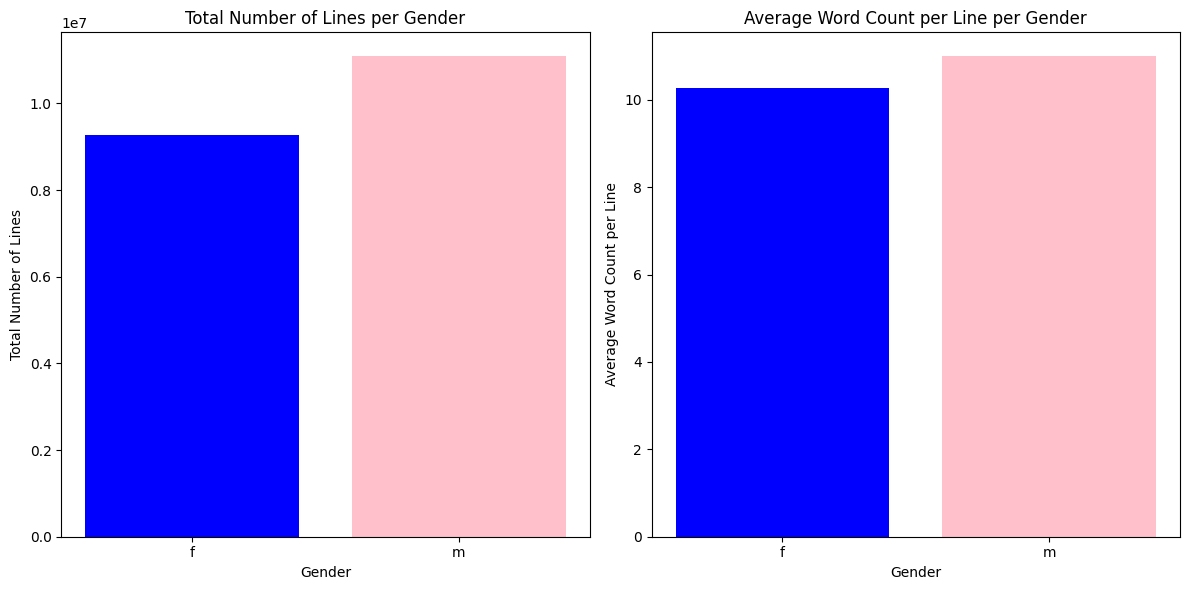

In [37]:
# Calculate the total number of lines and the average word count per line for each gender
gender_stats = final_df.groupby('meta.gender').agg(
    total_lines=('line_count', 'sum'),
    avg_word_count=('wordCountLine', 'mean')
).reset_index()

# Show statistics per gender
print(gender_stats)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the total number of lines per gender
axes[0].bar(gender_stats['meta.gender'], gender_stats['total_lines'], color=['blue', 'pink'])
axes[0].set_title('Total Number of Lines per Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Number of Lines')

# Plot the average word count per line per gender
axes[1].bar(gender_stats['meta.gender'], gender_stats['avg_word_count'], color=['blue', 'pink'])
axes[1].set_title('Average Word Count per Line per Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Word Count per Line')

# Show the plots
plt.tight_layout()
plt.show()

C:\Users\joda\AppData\Local\Temp\ipykernel_1260\3031845681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='meta.gender', y='lineLength', data=final_df, palette={"m": "pink", "f": "blue"})


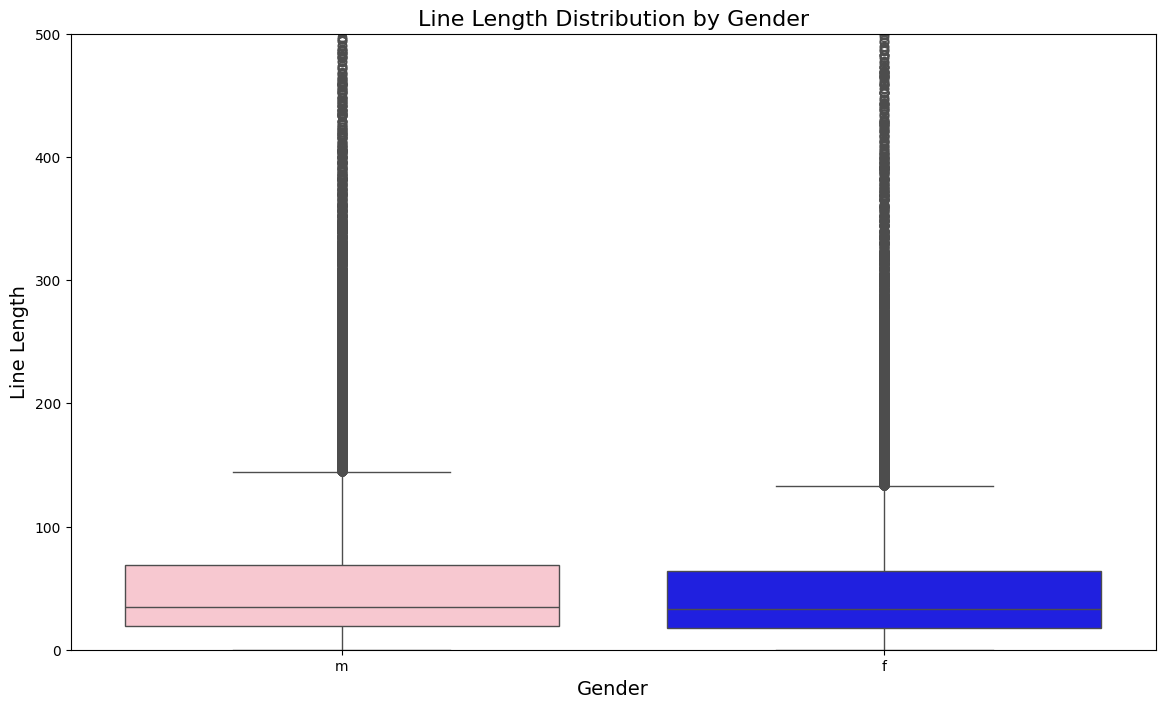

In [38]:
# Line Lenght Distribution by Gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='meta.gender', y='lineLength', data=final_df, palette={"m": "pink", "f": "blue"})
plt.title('Line Length Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Line Length', fontsize=14)
plt.ylim(0, 500)  
plt.show()

meta.gender          f      m
meta.credit_pos              
1                13367  27592
10+              12891  12219
2                22598   9911
3                 8745   7164
4                 5203   4251
5                 2401   3426
6                 2295   2528
7                 1288   1426
8                 1321   1432
9                 1146    819


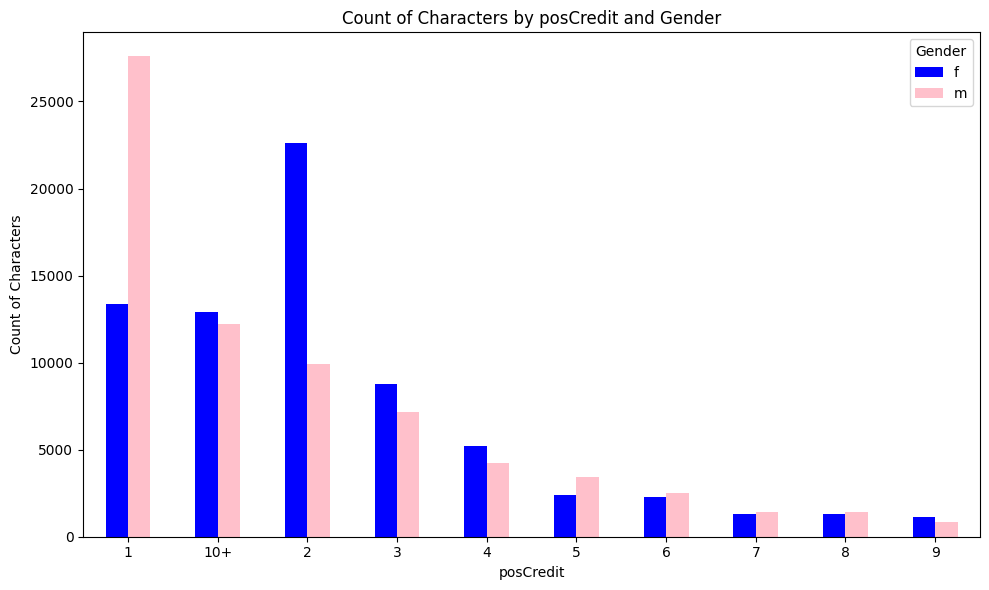

In [39]:
# Calculate the number of characters per posCredit and gender
posCredit_gender_counts = final_df.groupby(['meta.credit_pos', 'meta.gender']).size().unstack(fill_value=0)

# Show the count per Credit and gender
print(posCredit_gender_counts)

# Plot the data
posCredit_gender_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])
plt.title('Count of Characters by posCredit and Gender')
plt.xlabel('posCredit')
plt.ylabel('Count of Characters')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Mantiene le etichette sull'asse x orizzontali
plt.tight_layout()
plt.show()

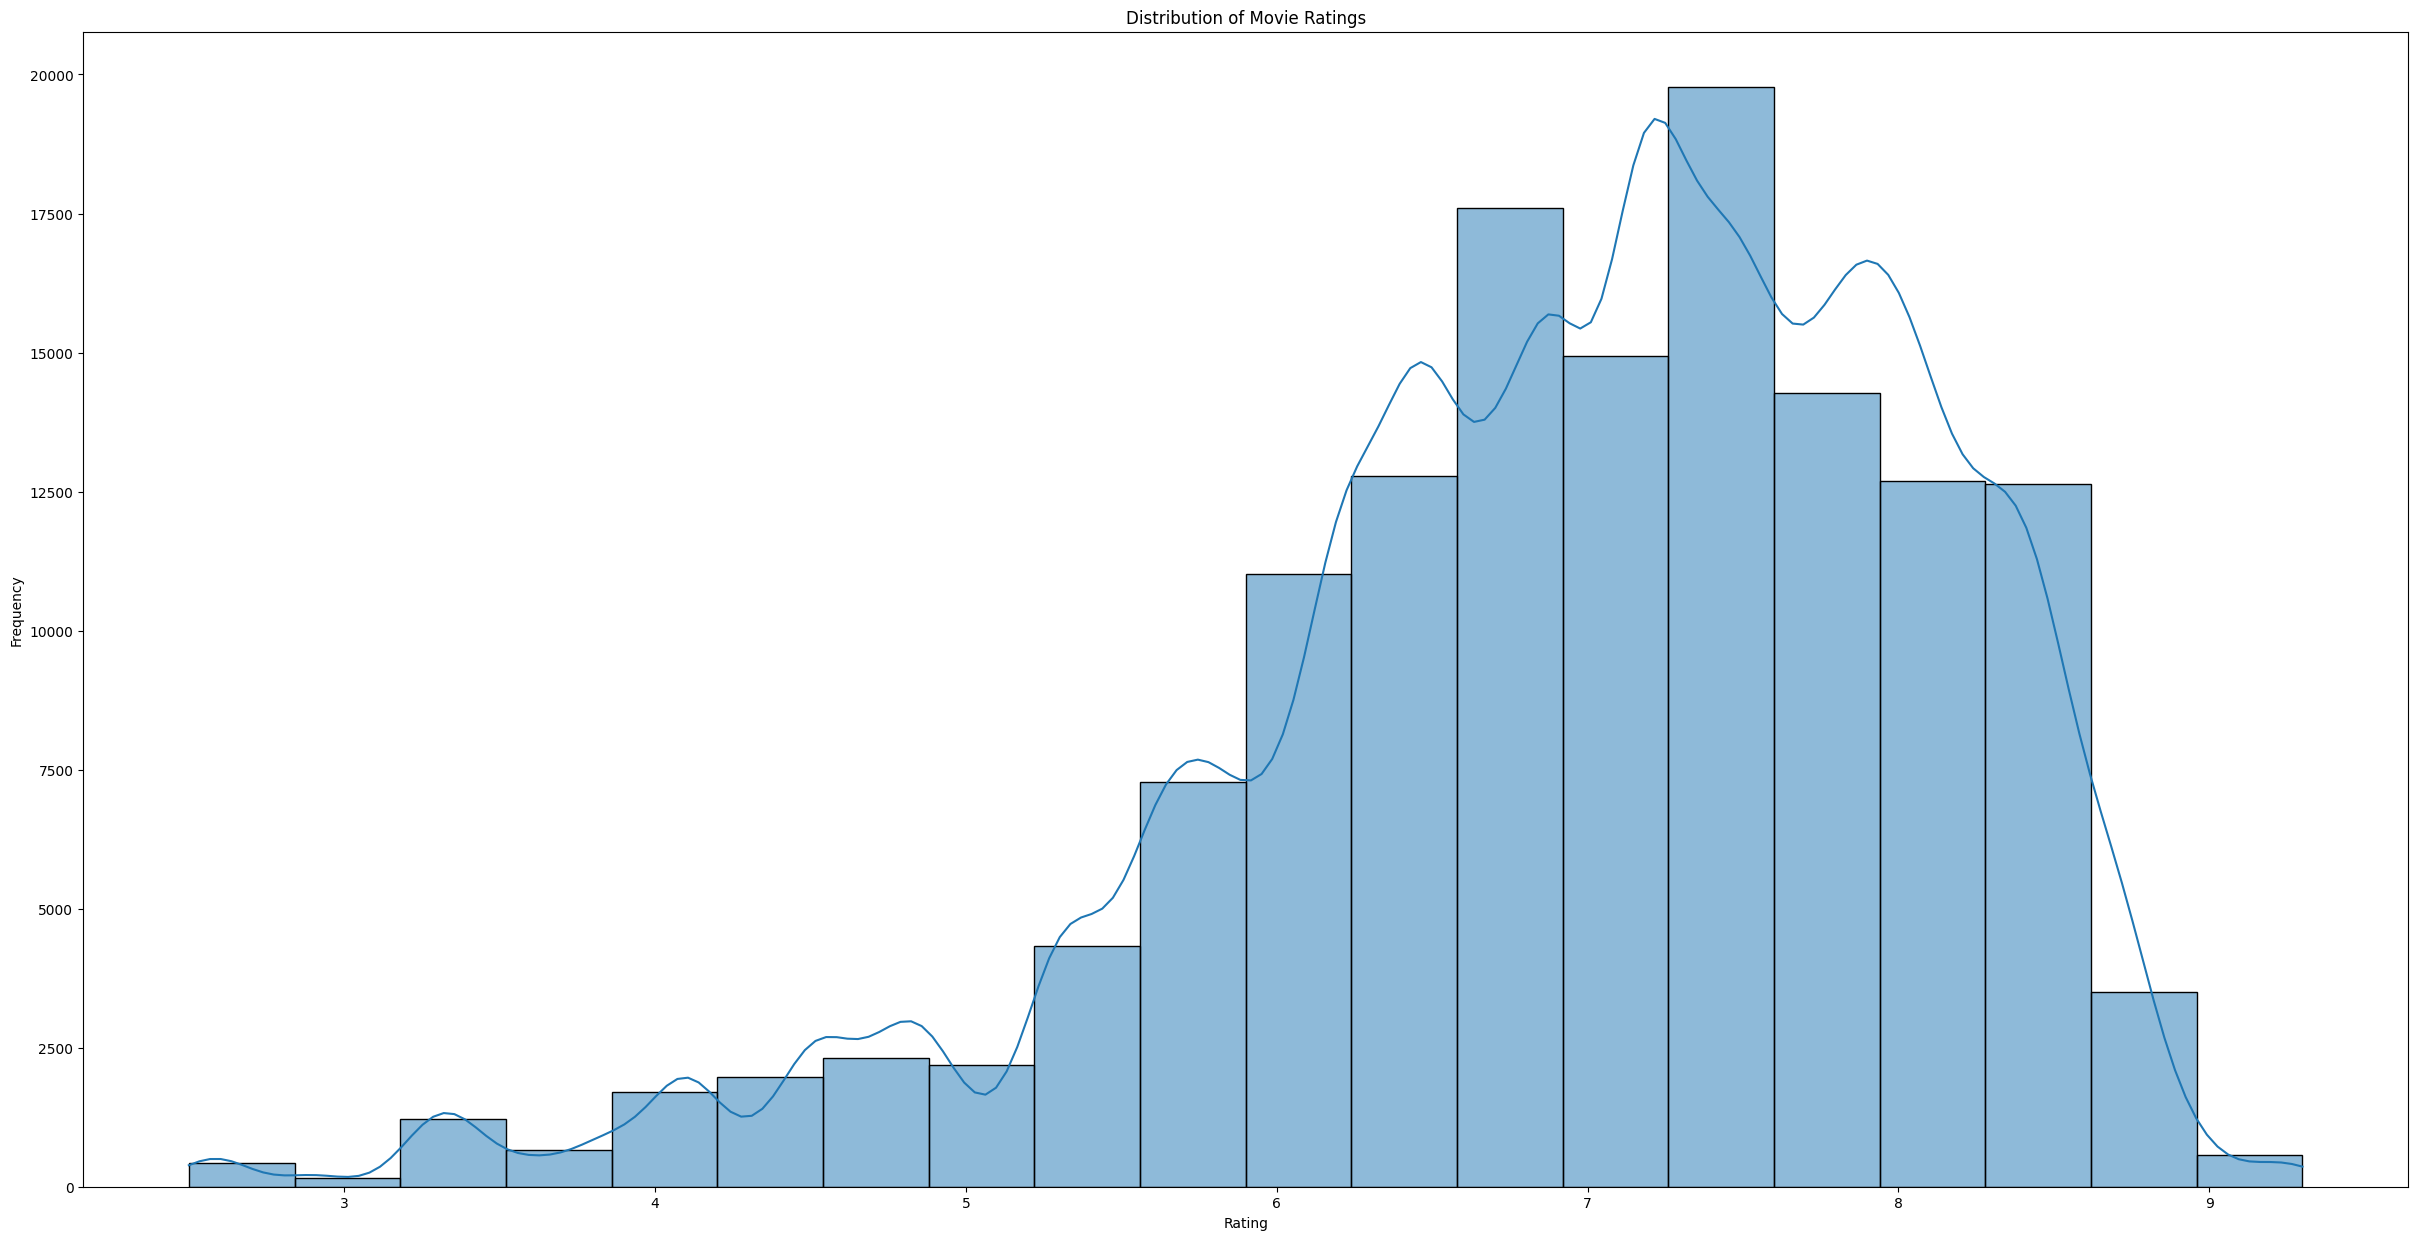

In [40]:
# Ratings Distribution 
plt.figure(figsize=(30, 15))
sns.histplot(final_df['meta.rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

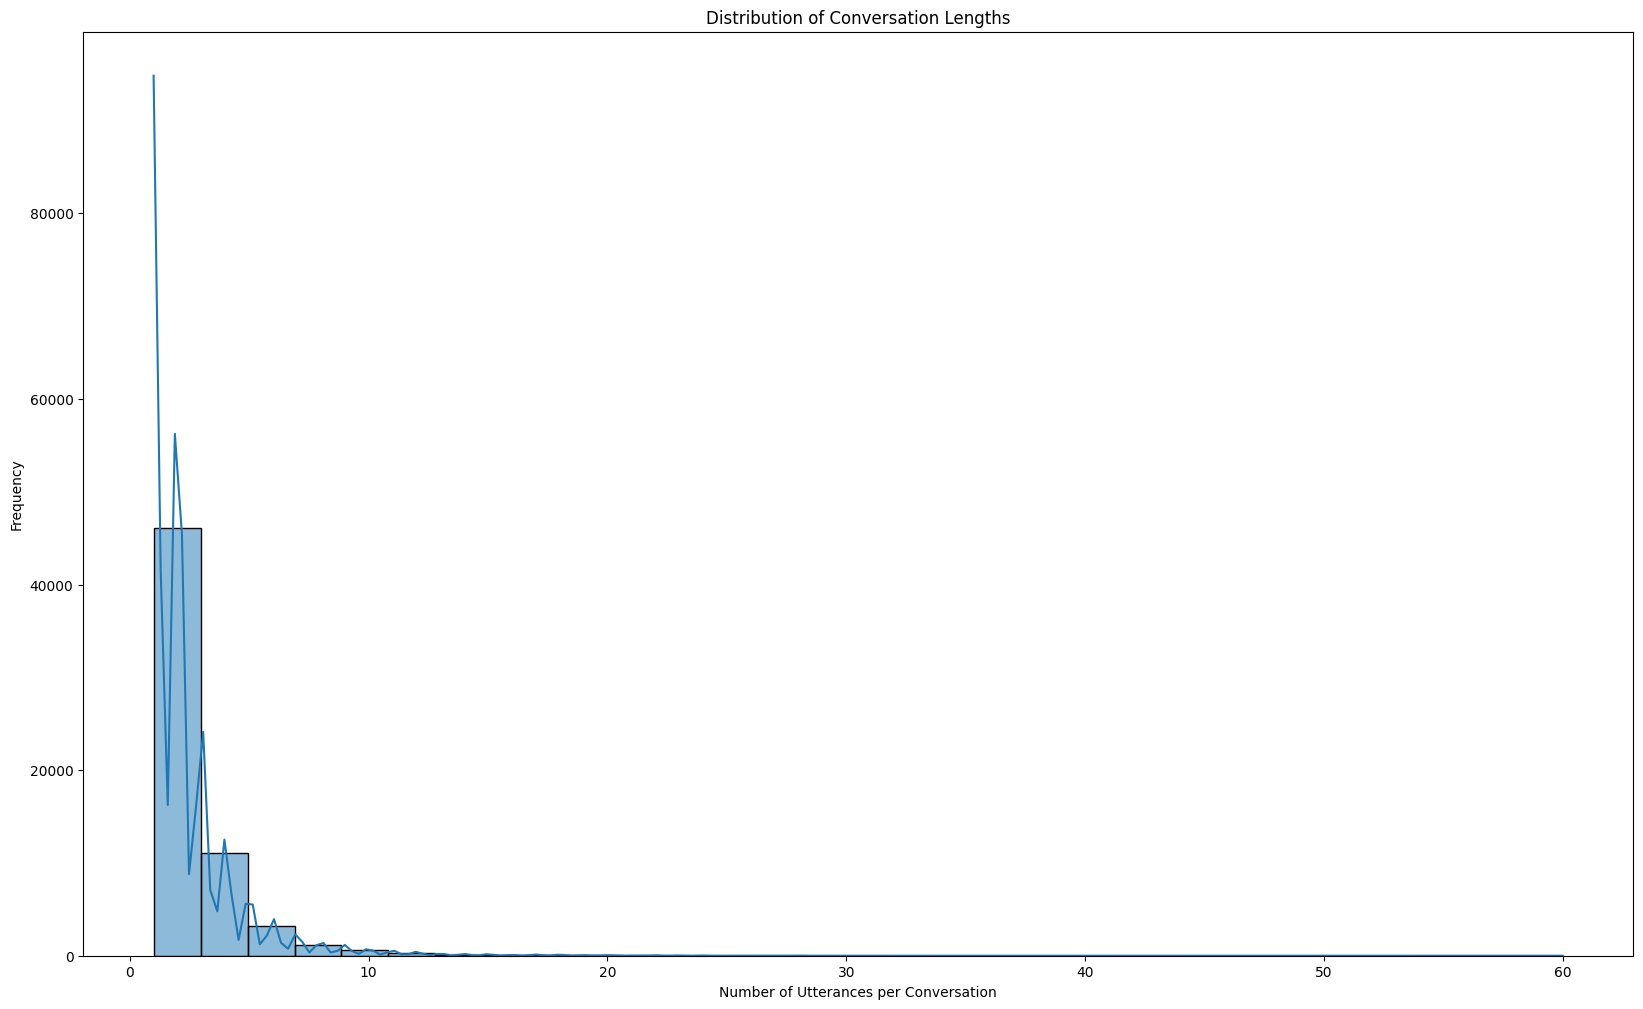

In [41]:
# Conversations lenghts
conversation_lengths = final_df['conversation_id'].value_counts()

plt.figure(figsize=(20, 12))
sns.histplot(conversation_lengths, bins=30, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Utterances per Conversation')
plt.ylabel('Frequency')
plt.show()


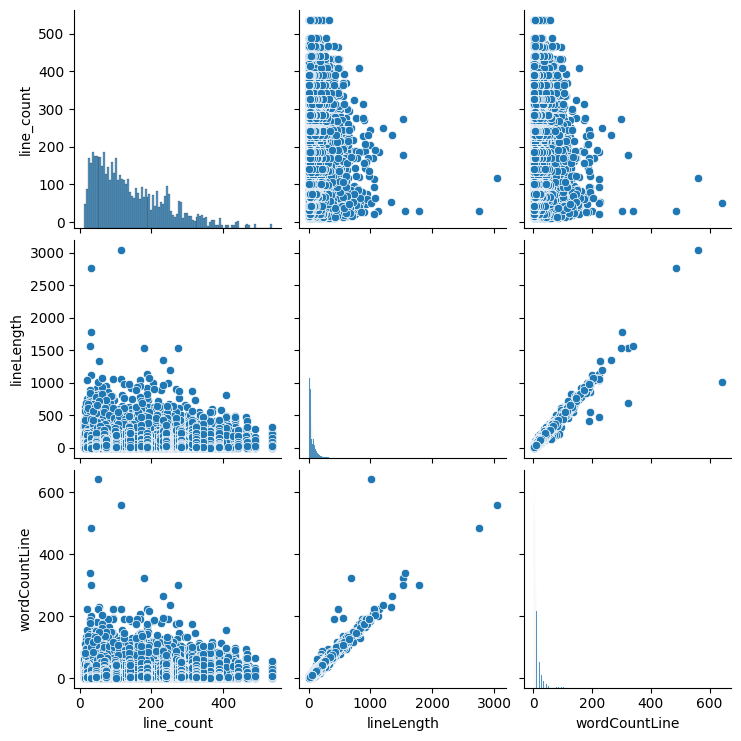

In [42]:
# Pairplot about lines features
sns.pairplot(final_df[['line_count', 'lineLength',	'wordCountLine']])
plt.show()

In [43]:
# Create Labelcoder
label_encoder = LabelEncoder()

# Applied to meta.gender
final_df['gender_encoded'] = label_encoder.fit_transform(final_df['meta.gender'])

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)

{'f': 0, 'm': 1}


## Pre-processing

In [44]:
# Extend stopwords list
stop_words = set(stopwords.words('english'))
stop_words.update([',', '.', '?', ':', ';', "'", '“', '”', '!', '’', '...', '....', '--', '_'])

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [45]:
# Apply preprocessing
final_df['processed_text'] = final_df['text'].apply(preprocess_text)

## Pre - Models

Vectorization

In [46]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) 
X_text = vectorizer.fit_transform(final_df['processed_text'])

Encoding

In [47]:
# Encoding the labels
le = LabelEncoder()
final_df['gender_label'] = le.fit_transform(final_df['meta.gender'])
y = final_df['gender_label']

In [48]:
# Apply LabelEncoder to meta.credit_pos
credit_pos_encoder = LabelEncoder()
final_df['encoded_credit_pos'] = credit_pos_encoder.fit_transform(final_df['meta.credit_pos'])

Train the Model

In [49]:
#shuffle the data
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine the text features with the other features
X_other = final_df[['line_count', 'encoded_credit_pos', 'medianLineLength', 'medianWordCountLine']]

# Convert X_other to a sparse matrix and combine with X_text
X_other_sparse = csr_matrix(X_other.values)
X_combined = hstack([X_text, X_other_sparse])

In [50]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

## Naive Bayers

In [51]:
# Start the timer for the entire process
start_time = time.time()
# Initialize the Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
nb_y_pred = nb_clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, nb_y_pred)
report = classification_report(y_test, nb_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           f       0.57      0.63      0.60     14280
           m       0.59      0.53      0.56     14125

    accuracy                           0.58     28405
   macro avg       0.58      0.58      0.58     28405
weighted avg       0.58      0.58      0.58     28405

Total Execution Time: 0.05235600471496582 seconds


In [52]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) 
X_text_1 = vectorizer.fit_transform(final_df['processed_text'])

# Binarizzazione dei dati TF-IDF
binarizer = Binarizer()
X_binary = binarizer.fit_transform(X_text_1.toarray())

In [53]:
# Combine the text features with the other features
X_other_1 = final_df[['line_count', 'encoded_credit_pos', 'medianLineLength', 'medianWordCountLine']]

# Convert X_other to a sparse matrix and combine with X_text
X_other_sparse_1 = csr_matrix(X_other_1.values)
X_combined_1 = hstack([X_text_1, X_other_sparse_1])

# Split the data into 80% training and 20% testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_combined_1, y, test_size=0.2, random_state=42)

In [54]:
# Start the timer for the entire process
start_time = time.time()

# Inizializzazione del Bernoulli Naive Bayes
bnb = BernoulliNB()

# Addestramento del modello
bnb.fit(X_train_1, y_train_1)

# Predizione
y_pred = bnb.predict(X_test_1)

# Valutazione del modello
accuracy = accuracy_score(y_test_1, y_pred)
report = classification_report(y_test_1, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53     14280
           1       0.49      0.43      0.46     14125

    accuracy                           0.50     28405
   macro avg       0.50      0.50      0.50     28405
weighted avg       0.50      0.50      0.50     28405

Total Execution Time: 0.1086111068725586 seconds


## Logistic Regression

In [55]:
# On full dataset
# Start the timer for the entire process
start_time = time.time()

# Logistic Regression classifier
lr_clr = LogisticRegression(solver = 'lbfgs', n_jobs=-1) 
lr_clr.fit(X_train, y_train)

# Predictions
lr_y_pred = lr_clr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           f       0.57      0.57      0.57     14280
           m       0.57      0.57      0.57     14125

    accuracy                           0.57     28405
   macro avg       0.57      0.57      0.57     28405
weighted avg       0.57      0.57      0.57     28405

Total Execution Time: 3.5272486209869385 seconds


# Random Forest 

In [56]:
# Start the timer for the entire process
start_time = time.time()

# Random Forest with all CPUs
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
rf_y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# End the timer for the entire process
end_time = time.time()

# Calculate the total elapsed time
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")

Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           f       0.56      0.58      0.57     14280
           m       0.56      0.54      0.55     14125

    accuracy                           0.56     28405
   macro avg       0.56      0.56      0.56     28405
weighted avg       0.56      0.56      0.56     28405

Total Execution Time: 118.3614854812622 seconds


0.5679985917972188


# Bert

In [71]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [78]:
# Bert model
from transformers import BertTokenizer, BertModel
import torch

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
tokens = tokenizer.tokenize(final_df['processed_text'])

# Encode the tokens
encoded_tokens = tokenizer.encode(final_df['processed_text'], add_special_tokens=True)

# Convert the tokens to PyTorch tensors
tokens_tensor = torch.tensor(encoded_tokens)

# Load the pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Get the hidden states of the model
with torch.no_grad():
    outputs = model(tokens_tensor.unsqueeze(0))

# Get the hidden states
hidden_states = outputs[0]

# Get the final hidden state
final_hidden_state = hidden_states[-1]

# Get the first token embedding
token_vec = hidden_states[0][0]

# Get the sentence embedding
sentence_embedding = torch.mean(hidden_states[0], dim=0)





OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\joda\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.

# Cross Validation

Cross-validation scores for Multinomial Naive Bayes: [0.55335328 0.55388136 0.5479317  0.54918321 0.55601324]
Mean accuracy: 0.552072559031517
Cross-validation scores for Bernoulli Naive Bayes: [0.50177786 0.49980637 0.50424221 0.49753556 0.50014083]
Mean accuracy: 0.5007005645230319
Cross-validation scores for Logistic Regression: [0.55500792 0.55743707 0.55599366 0.56023799 0.55534432]
Mean accuracy: 0.5568041935033434
Cross-validation scores for Random Forest: [0.54398873 0.54944552 0.54384791 0.54907759 0.54950007]
Mean accuracy: 0.5471719667499745


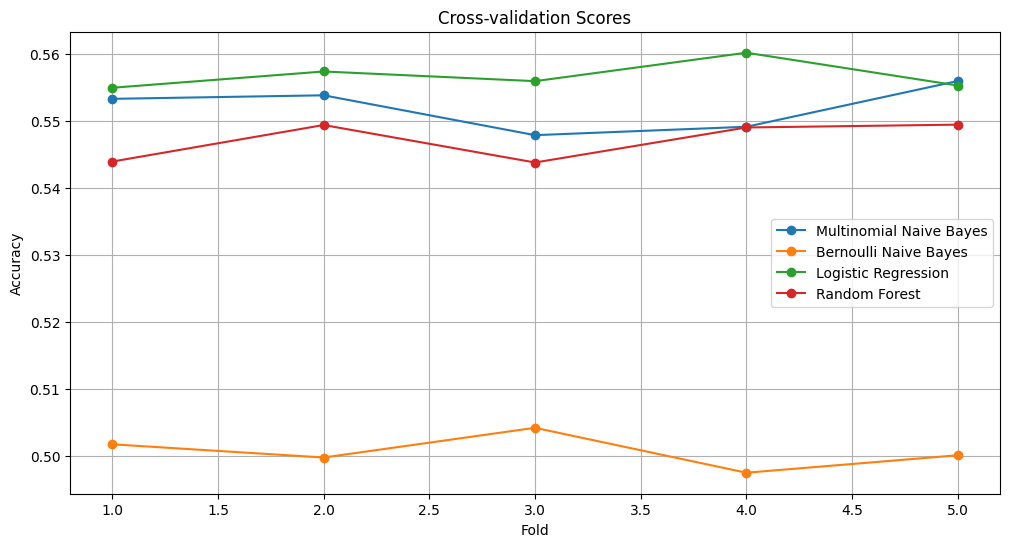

In [61]:

# Cross-validation for Multinomial Naive Bayes
nb_scores = cross_val_score(nb_clf, X_combined, y, cv=5, scoring='accuracy')
print("Cross-validation scores for Multinomial Naive Bayes:", nb_scores)
print("Mean accuracy:", nb_scores.mean())

# Cross-validation for Bernoulli Naive Bayes
bnb_scores = cross_val_score(bnb, X_combined_1, y, cv=5, scoring='accuracy')
print("Cross-validation scores for Bernoulli Naive Bayes:", bnb_scores)
print("Mean accuracy:", bnb_scores.mean())

# Cross-validation for Logistic Regression
lr_scores = cross_val_score(lr_clr, X_combined, y, cv=5, scoring='accuracy')
print("Cross-validation scores for Logistic Regression:", lr_scores)
print("Mean accuracy:", lr_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf, X_combined, y, cv=5, scoring='accuracy')
print("Cross-validation scores for Random Forest:", rf_scores)
print("Mean accuracy:", rf_scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), nb_scores, label='Multinomial Naive Bayes', marker='o')
plt.plot(range(1, 6), bnb_scores, label='Bernoulli Naive Bayes', marker='o')
plt.plot(range(1, 6), lr_scores, label='Logistic Regression', marker='o')
plt.plot(range(1, 6), rf_scores, label='Random Forest', marker='o')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()




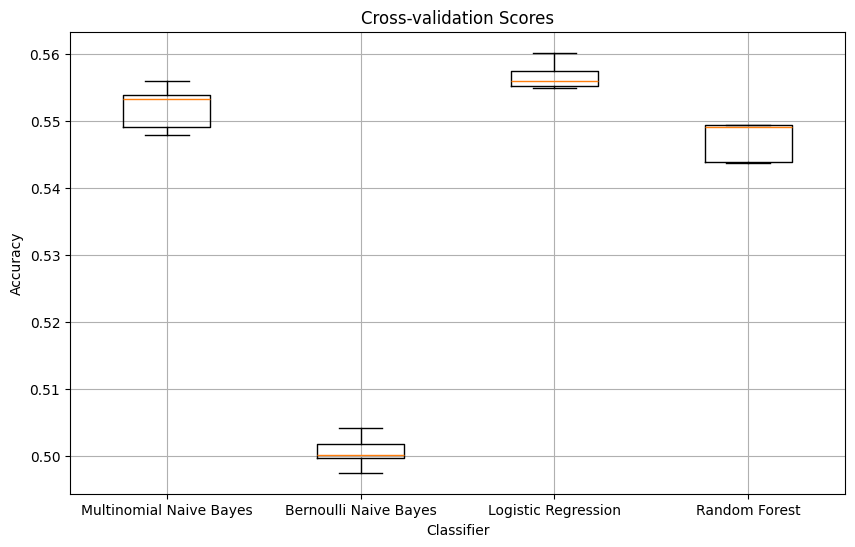

In [62]:
all_scores = [nb_scores, bnb_scores, lr_scores, rf_scores]

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(all_scores, labels=['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression', 'Random Forest'])
plt.title('Cross-validation Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.grid()
plt.show()